In [1]:
import cv2
from tqdm import tqdm
from glob import glob

import xml.etree.ElementTree as ET

from IPython.display import *

def show(img):
    cv2.imwrite('test.jpg', img)
    display(Image('test.jpg'))

In [2]:
fnames = glob('xuelang_round1_train_part2_20180705/*/*.jpg')
img_fname = fnames[5]
img_fname

'xuelang_round1_train_part2_20180705/边针眼/J01_2018.06.23 08_54_57.jpg'

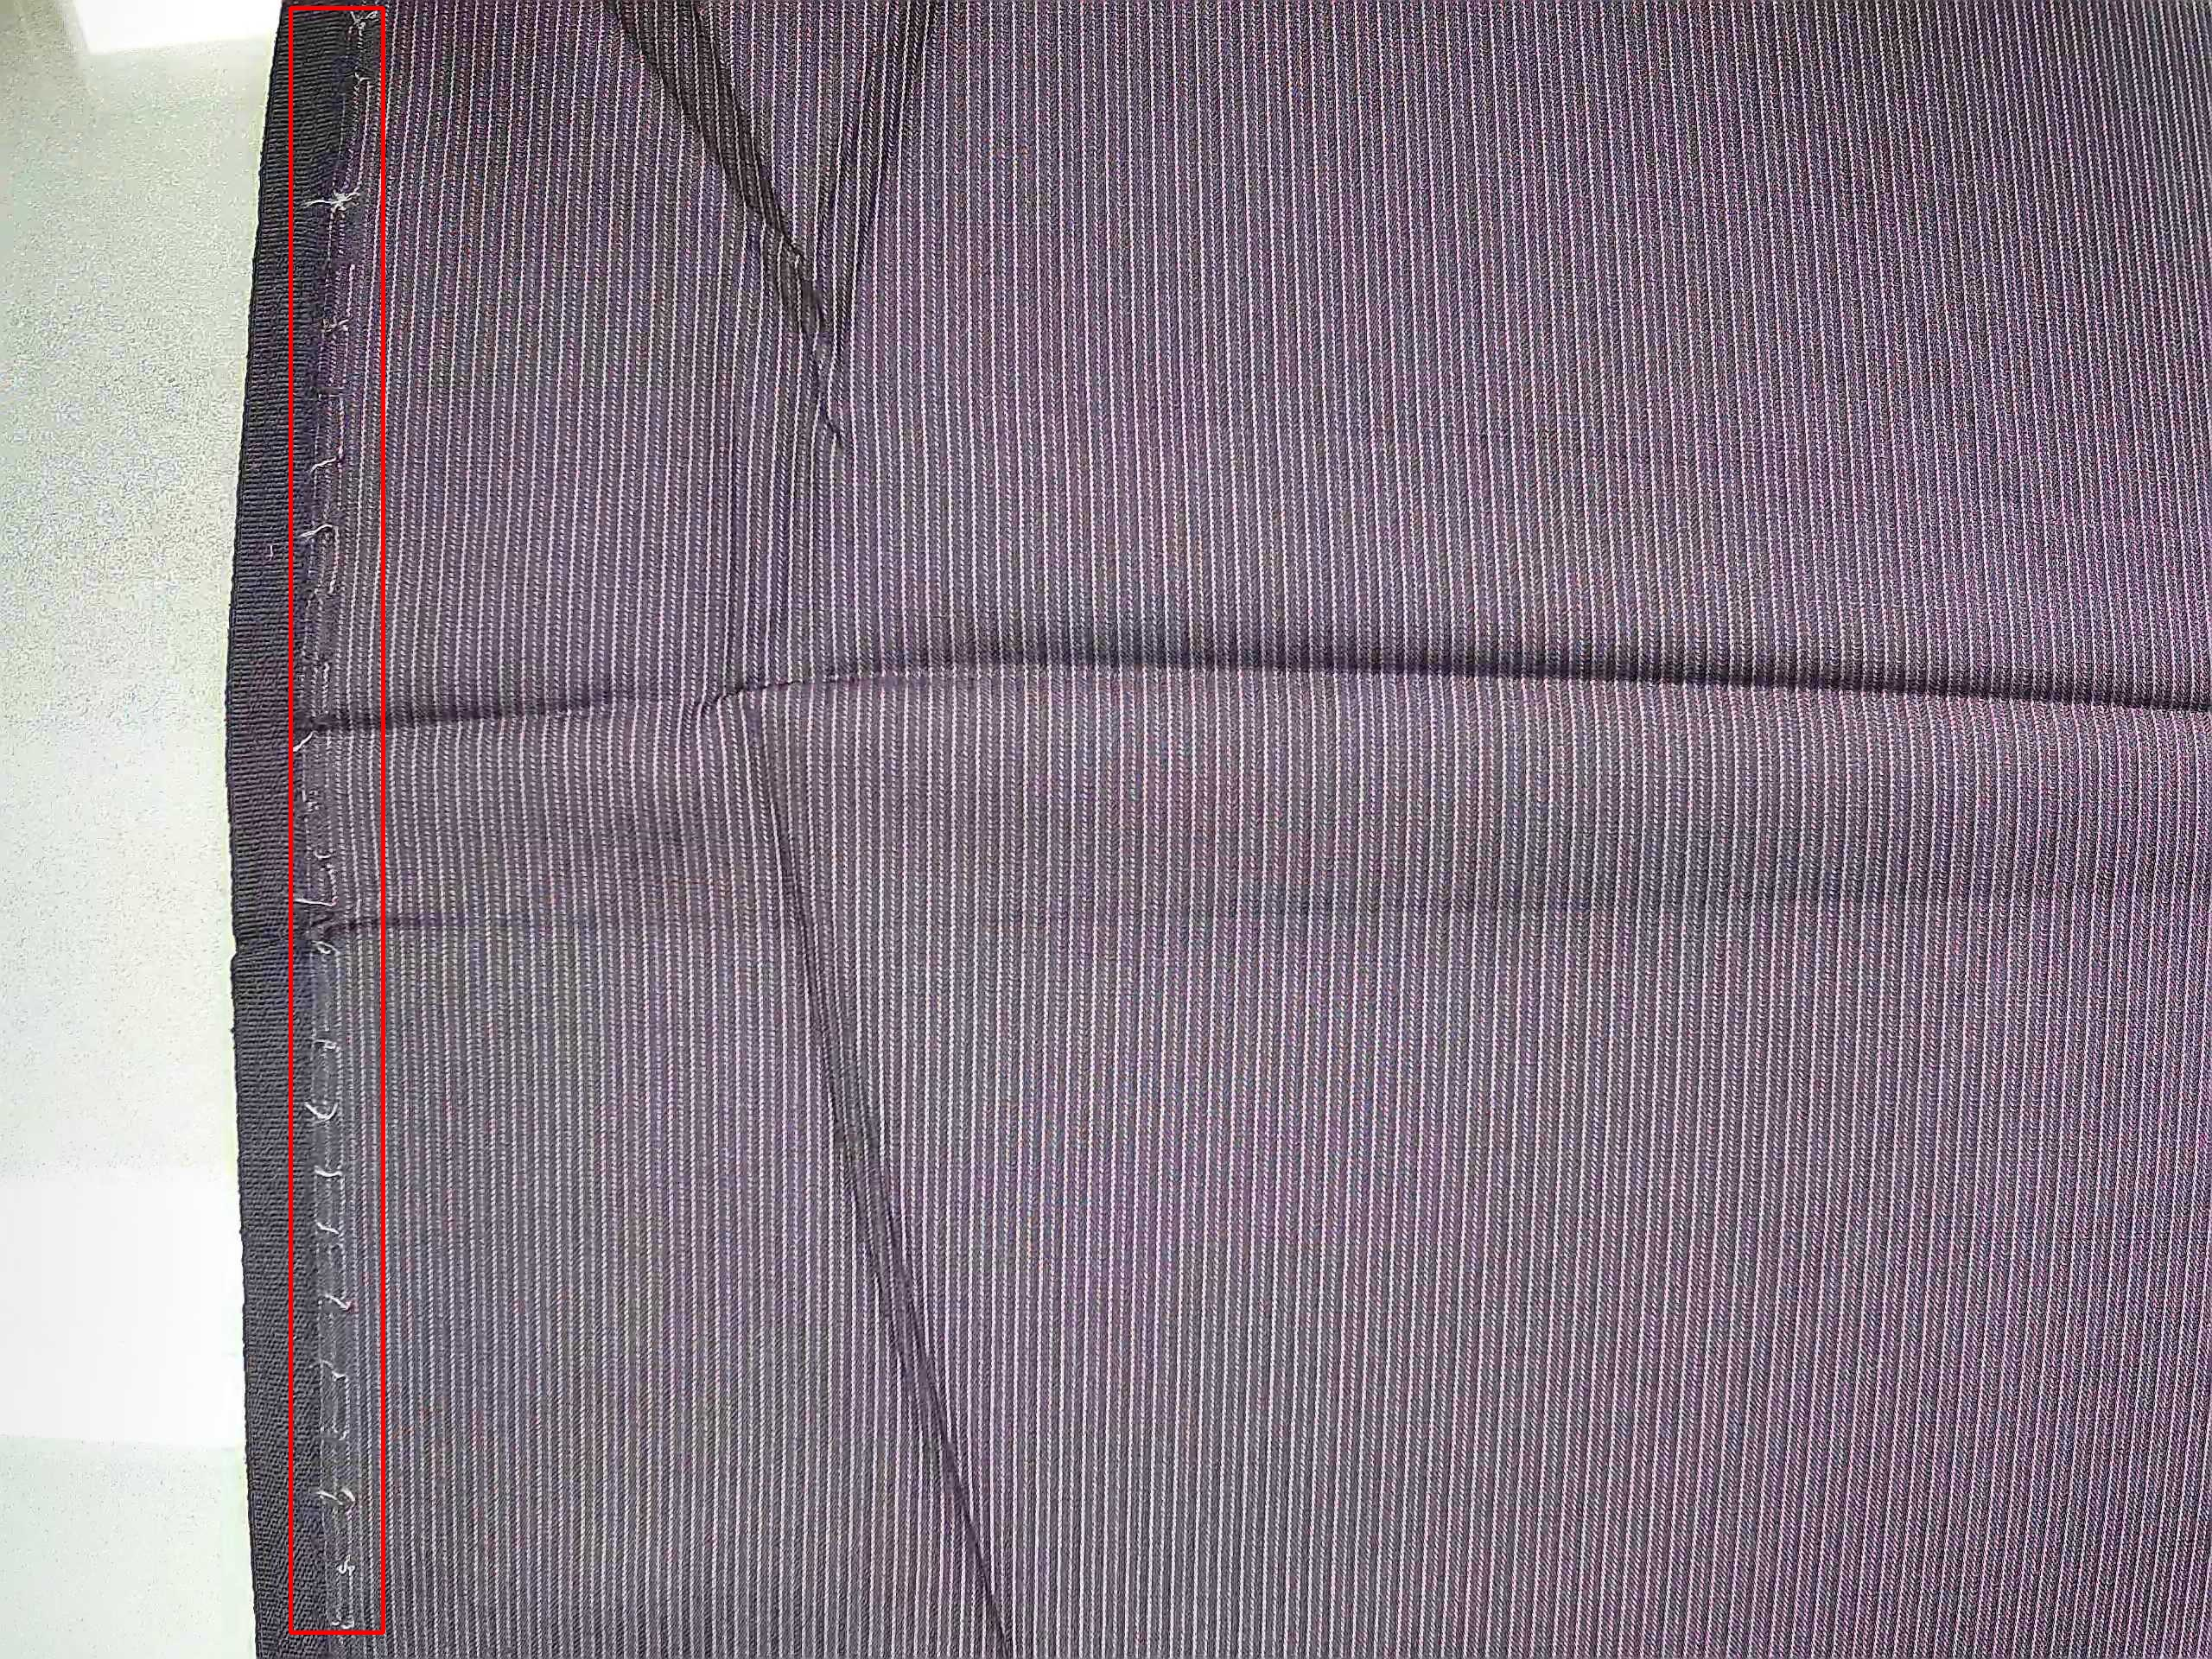

In [3]:
img = cv2.imread(img_fname)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_vis = img.copy()
xml_fname = img_fname.replace('.jpg', '.xml')
tree = ET.parse(xml_fname)
for ob in tree.findall('object'):
    bbox = ob.find('bndbox')
    tagname = ob.find('name').text
    x1, y1, x2, y2 = [int(x.text) for x in bbox.getchildren()]
    cv2.rectangle(img_vis, (x1, y1), (x2, y2), color=(0, 0, 255), thickness=3)

show(img_vis)